In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 =pd.read_csv("order_details.csv")
df1.head()
#df.info()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [2]:
df2 =pd.read_csv("orders.csv")
df2.head()


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
df2["date"] = df2["date"].astype("datetime64[ns]")
df2["time"] = df2["time"].astype("datetime64[ns]")
df2.info()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13380\2811746540.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["time"] = df2["time"].astype("datetime64[ns]")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 500.5 KB


In [4]:
df2["day"] = df2["date"].dt.strftime("%A")
df2["hours"] = df2["time"].dt.strftime("%H")
df2.head()
#df2.info()

,order_id,date,time,day,hours
0,1,2015-01-01,2023-10-18 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-18 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-18 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-18 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-18 12:21:30,Thursday,12


In [5]:
df2["hours"] = df2["hours"].astype("int64")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  datetime64[ns]
 3   day       21350 non-null  object        
 4   hours     21350 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 834.1+ KB


In [6]:
df3 =pd.read_csv("pizza_types.csv", encoding = 'unicode_escape')
df3.head()
#df3.info()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [7]:
df4 =pd.read_csv("pizzas.csv")
df4.head()
#df4.info()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [8]:
#1. identify the time at which we are getting high orders and the time at which we are getting the lowest orders
df2.head()

,order_id,date,time,day,hours
0,1,2015-01-01,2023-10-18 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-18 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-18 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-18 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-18 12:21:30,Thursday,12


In [9]:
gb = df2.groupby("hours").agg({"order_id" : "count"})
gb

,order_id
hours,
9,1
10,8
11,1231
12,2520
13,2455
14,1472
15,1468
16,1920
17,2336


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

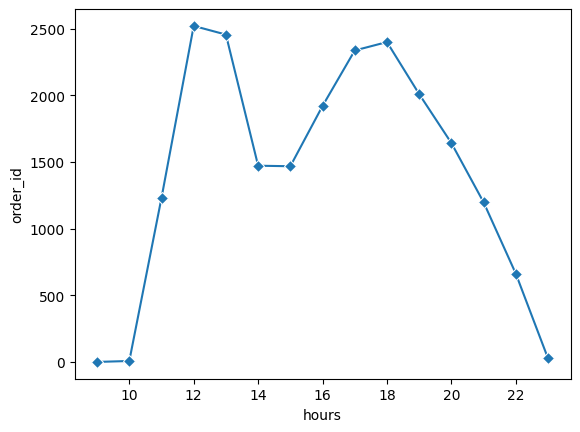

In [10]:
sns.lineplot(data = gb, x = "hours", y = "order_id" ,marker = "D")
plt.show()

In [11]:
# At 12 Noon ,we get higher orders in the day.
# B/W 9 and 10 in the morning, we get lowest orders in the day.

In [12]:
#2. identify which day of the week we are getting the hight orderes


In [13]:
df2.head()

,order_id,date,time,day,hours
0,1,2015-01-01,2023-10-18 11:38:36,Thursday,11
1,2,2015-01-01,2023-10-18 11:57:40,Thursday,11
2,3,2015-01-01,2023-10-18 12:12:28,Thursday,12
3,4,2015-01-01,2023-10-18 12:16:31,Thursday,12
4,5,2015-01-01,2023-10-18 12:21:30,Thursday,12


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

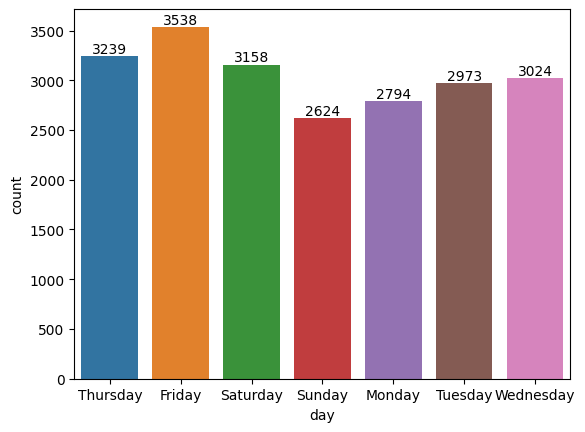

In [14]:
ax = sns.countplot(data = df2, x = "day")
ax.bar_label(ax.containers[0])
plt.show

In [15]:
#3. total sales

In [16]:
df5 = pd.merge(left = df1, right = df4, on = "pizza_id", how = "inner")
df5.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [17]:
df5["sales"] = df5["quantity"] * df5["price"]
df5.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,sales
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [18]:
print("TOTAL SALES IS : ", df5["sales"].sum())

TOTAL SALES IS :  817860.0499999999


In [19]:
#4. identify which pizza is ordered the most

In [20]:
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [21]:
df6 = pd.merge(left =df5 , right =df3 , on = "pizza_type_id", how = "inner")
df6.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,sales,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [22]:
gp = df6.groupby("name").agg({"order_details_id" : "count"})
gp

,order_details_id
name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [23]:
a1 = gp["order_details_id"].idxmax()
print("Most ordered pizza is : ",a1)

Most ordered pizza is :  The Classic Deluxe Pizza


In [24]:
a2 = gp["order_details_id"].idxmin()
print("Least ordered pizza is : ",a2)

Least ordered pizza is :  The Brie Carre Pizza


In [25]:
# 5. Identify which pizza is generating more sales
df6.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,sales,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [26]:
gp = df6.groupby("name").agg({"sales" : "sum"})
gp

,sales
name,
The Barbecue Chicken Pizza,42768.00
The Big Meat Pizza,22968.00
The Brie Carre Pizza,11588.50
The Calabrese Pizza,15934.25
The California Chicken Pizza,41409.50
The Chicken Alfredo Pizza,16900.25
The Chicken Pesto Pizza,16701.75
The Classic Deluxe Pizza,38180.50
The Five Cheese Pizza,26066.50


In [28]:
a = gp["sales"].idxmax()
print("pizza generating more sales : ", a)

pizza generating more sales :  The Thai Chicken Pizza


In [29]:
# 6. Identify at which time of the day, people are ordering more pizzas.       (morning/evening/afternoon/night)


df2.loc[(df2["hours"]< 12), "period"] = "Morning"
df2.loc[(df2["hours"]>=12) & (df2["hours"]<17), "period"] = "Afternoon"
df2.loc[(df2["hours"]>=17) & (df2["hours"]<21), "period"] = "Evening"
df2.loc[(df2["hours"]>=21),"period"] = "Night"

df2.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13380\363783011.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Morning' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2["hours"]< 12), "period"] = "Morning"


,order_id,date,time,day,hours,period
0,1,2015-01-01,2023-10-18 11:38:36,Thursday,11,Morning
1,2,2015-01-01,2023-10-18 11:57:40,Thursday,11,Morning
2,3,2015-01-01,2023-10-18 12:12:28,Thursday,12,Afternoon
3,4,2015-01-01,2023-10-18 12:16:31,Thursday,12,Afternoon
4,5,2015-01-01,2023-10-18 12:21:30,Thursday,12,Afternoon


In [30]:
df2.groupby("period").agg({"period" : "count"})

,period
period,
Afternoon,9835
Evening,8386
Morning,1240
Night,1889


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


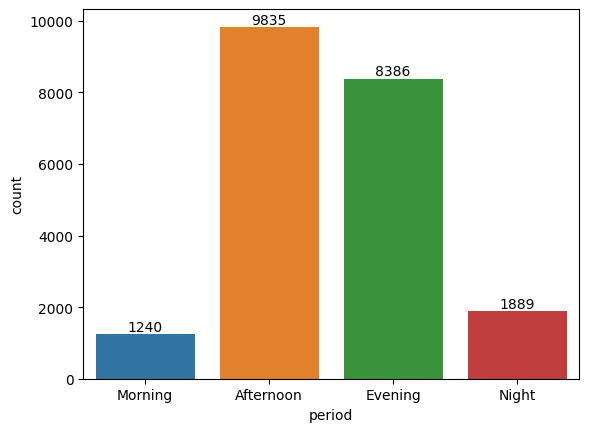

In [31]:
ax = sns.countplot(data = df2, x = "period")
ax.bar_label(ax.containers[0])
plt.show()

In [32]:
# 7. Identify which pizza category is hotselling.

gp = df6.groupby("category").agg({"order_details_id" : "count"})
gp

,order_details_id
category,
Chicken,10815
Classic,14579
Supreme,11777
Veggie,11449


In [33]:
print("Hotselling Category of pizza is: ", gp["order_details_id"].idxmax())

Hotselling Category of pizza is:  Classic
